# 8.2 TensorFlow & Keras

- Installing TensorFlow
- Loading images

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 36.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.preprocessing.image import load_img

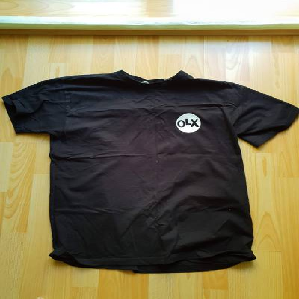

In [6]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = f"{path}/{name}"

load_img(fullname, target_size=(299,299))


In [7]:
img = load_img(fullname, target_size=(299,299))

print(img)

x = np.array(img)
x.shape

<PIL.Image.Image image mode=RGB size=299x299 at 0x7DD0AC911D60>


(299, 299, 3)

# 8.3 Pre-trained convolutional neural networks

- Imagenet dataset: <a href="https://www.image-net.org/">https://www.image-net.org/</a>
- Pre-trained models: <a href=https://keras.io/api/applications/>https://keras.io/api/applications/</a>

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from  tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
X = np.array([x,x,x])
X.shape

(3, 299, 299, 3)

In [11]:
X = preprocess_input(np.array([x]))
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [12]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step


In [13]:
pred.shape

(1, 1000)

In [14]:
decode_predictions(pred, top=3)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.68196356)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139977)),
  ('n04370456', 'sweatshirt', np.float32(0.034324735))]]

# 8.4 Convolutiona neural networks

- Types of layers: convolutional and dense
- COnvolutional layers and filters
- Dense layers

Thare are more layers. Read here: [http://cs231n.github.io](http://cs231n.github.io)


Summary:
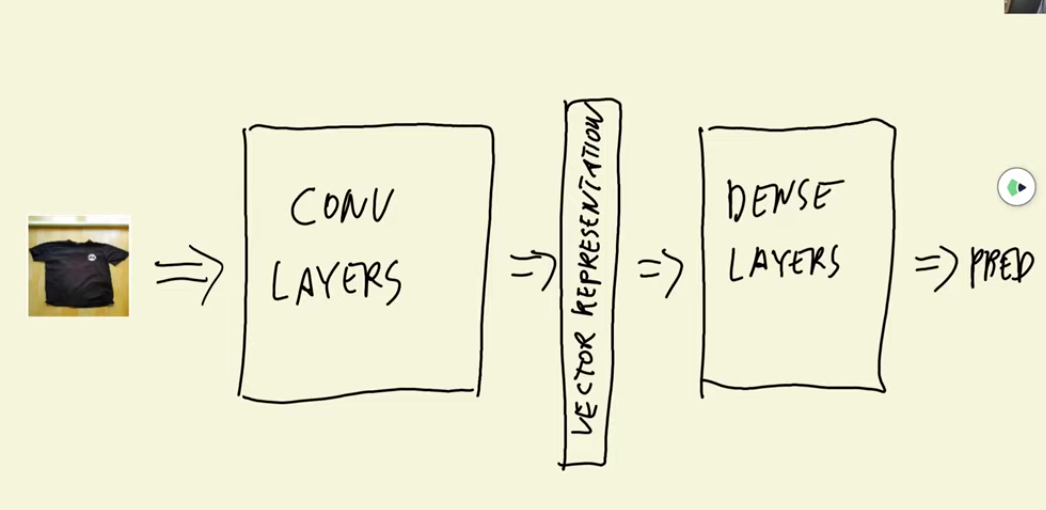

# 8.5 Transfer Learning

- Reading data with `ImageDataGenerator`
- Train Xception on small images (150x150)

(Better to run it with a GPU)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32)

In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X,y = next(train_ds)

In [20]:
X

array([[[[-0.10588235, -0.23921567, -0.4588235 ],
         [-0.10588235, -0.23921567, -0.4588235 ],
         [-0.10588235, -0.23921567, -0.4588235 ],
         ...,
         [-0.06666666, -0.19999999, -0.41960782],
         [-0.05882353, -0.19215685, -0.41176468],
         [-0.05098039, -0.18431371, -0.40392154]],

        [[ 0.02745104, -0.10588235, -0.32549018],
         [ 0.00392163, -0.12941176, -0.3490196 ],
         [-0.00392157, -0.1372549 , -0.35686272],
         ...,
         [ 0.13725495,  0.00392163, -0.21568626],
         [ 0.13725495,  0.00392163, -0.21568626],
         [ 0.12941182, -0.00392157, -0.2235294 ]],

        [[-0.00392157, -0.1372549 , -0.35686272],
         [ 0.03529418, -0.09803921, -0.31764704],
         [ 0.0196079 , -0.11372548, -0.3333333 ],
         ...,
         [ 0.03529418, -0.09803921, -0.31764704],
         [ 0.05098045, -0.08235294, -0.30196077],
         [ 0.082353  , -0.05098039, -0.27058822]],

        ...,

        [[-0.18431371, -0.372549  , -0

In [21]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32, shuffle = False)

Found 341 images belonging to 10 classes.


`Include_top = False` means we are not includind the Dense Layers
`base_model.trainable =False` means we are freezening the convolutional layers


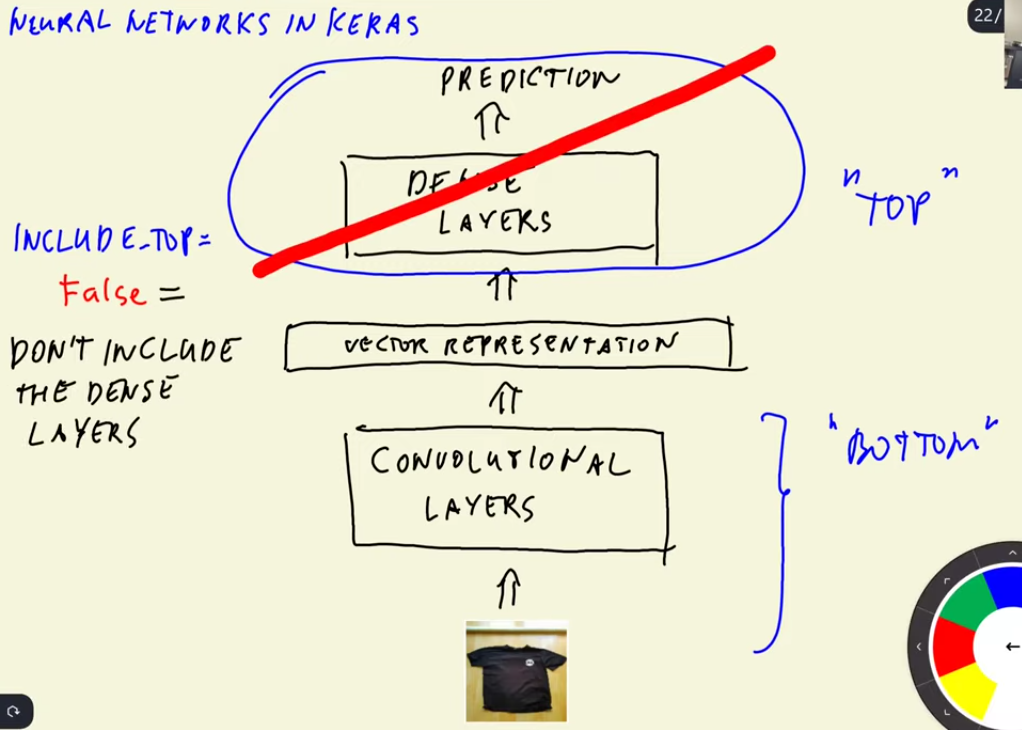

In [23]:
base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(150,150, 3)
                      )

base_model.trainable = False

#Create a new top

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training = False)

#flatten = keras.layers.Flatten()(pooling)
vectors = keras.layers.GlobalAveragePooling2D()(base)

#dense = keras.layers.Dense(64, activation="relu")(flatten)

outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# preds = model.predict(X)

# print(preds.shape)


# preds[0]


In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [26]:
# history = model.fit(train_ds,epochs=2, validation_data=val_ds)

In [27]:
# plt.plot(history.history["accuracy"],label = "train")
# plt.plot(history.history["val_accuracy"],label = "val")
# plt.legend()
# plt.show()

# 8.6 Adjusting the learning rate

In [28]:
def make_model(learning_rate = 0.01):
    base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(150,150, 3)
                      )

    base_model.trainable = False

    ###########################################
    #Create a new top
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["accuracy"]
                  )

    return model

In [29]:
# scores = {}

# for lr in [0.0001, 0.001, 0.01, 0.1]:
#   print(f"learning rate:{lr}")

#   model = make_model(learning_rate=lr)
#   history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#   scores[lr] = history.history

#   print()
#   print()

In [31]:
# for lr, hist in scores.items():
#   plt.plot(hist["val_accuracy"], label=f"lr:{lr}")

# plt.xticks(np.arange(10))
# plt.legend()
# plt.show()

In [32]:
learning_rate = 0.001

# 8.7 Checkpointing

- Saving the best model only
- training a model with callbacks

In [33]:
model.save_weights(filepath='model_v1.weights.h5')

In [35]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
    )

In [ ]:
# learning_rate = 0.001
# model = make_model(learning_rate=learning_rate)

# history = model.fit(
#     train_ds,
#     epochs=10,
#     validation_data=val_ds,
#     callbacks=[checkpoint]
#     )


# 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [36]:
def make_model(learning_rate = 0.01,size_inner=100):
    base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(150,150, 3)
                      )

    base_model.trainable = False

    ###########################################
    #Create a new top
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["accuracy"]
                  )

    return model

In [37]:
# learning_rate = 0.001

# scores = {}
# for size in [10, 100,1000]:
#   print(size)
#   model = make_model(learning_rate=learning_rate, size_inner=size)
#   history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#   scores[size] = history.history

10
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 366ms/step - accuracy: 0.3236 - loss: 2.0477 - val_accuracy: 0.5044 - val_loss: 1.5266
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.5638 - loss: 1.3051 - val_accuracy: 0.6891 - val_loss: 0.9540
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7152 - loss: 0.8559 - val_accuracy: 0.7625 - val_loss: 0.7458
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7836 - loss: 0.6485 - val_accuracy: 0.7742 - val_loss: 0.6670
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8363 - loss: 0.5313 - val_accuracy: 0.7830 - val_loss: 0.6589
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8441 - loss: 0.4635 - val_accuracy: 0.7918 - val_loss: 0.6134
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8694 - loss: 0.4139 - val_accuracy: 0.8006 - val_loss: 0.5859
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8788 - loss: 0.3700 - val_accuracy: 0.7947 - val_loss: 

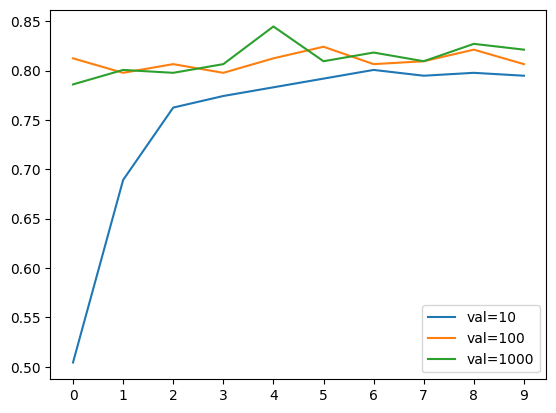

In [38]:
for size, hist in scores.items():
  plt.plot(hist["val_accuracy"],label = ('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()
plt.show()

# 8.9 Regularization and dropout

- Regularization by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [39]:
def make_model(learning_rate = 0.01,size_inner=100, drop_rate = 0.5):
    base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(150,150, 3)
                      )

    base_model.trainable = False

    ###########################################
    #Create a new top
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["accuracy"]
                  )

    return model

In [40]:
# learning_rate = 0.001
# size = 100

# scores = {}
# for d in [0, 0.1,0.2, 0.5, 0.8]:
#   print(d)
#   model = make_model(
#       learning_rate=learning_rate,
#       size_inner=size,
#       drop_rate=d)

#   history = model.fit(train_ds, epochs=30, validation_data=val_ds)
#   scores[d] = history.history

0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 214ms/step - accuracy: 0.5562 - loss: 1.2953 - val_accuracy: 0.7859 - val_loss: 0.6564
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8158 - loss: 0.5158 - val_accuracy: 0.8094 - val_loss: 0.5647
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8825 - loss: 0.3560 - val_accuracy: 0.7889 - val_loss: 0.5842
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9250 - loss: 0.2596 - val_accuracy: 0.8211 - val_loss: 0.5638
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9482 - loss: 0.1862 - val_accuracy: 0.8006 - val_loss: 0.5881
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9689 - loss: 0.1327 - val_accuracy: 0.8065 - val_loss: 0.5645
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9853 - loss: 0.0877 - val_accuracy: 0.8211 - val_loss: 0.5967
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9943 - loss: 0.0608 - val_accuracy: 0.7947

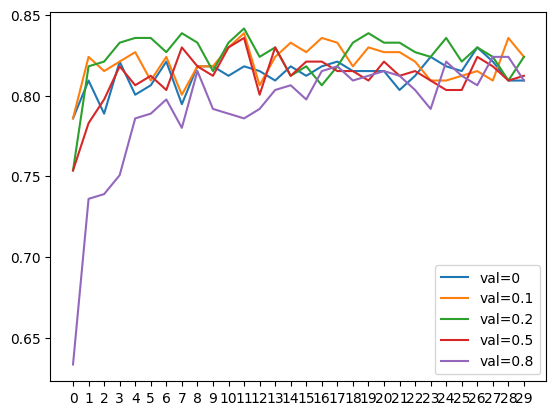

In [42]:
for d, hist in scores.items():
  plt.plot(hist["val_accuracy"],label = ('val=%s' % d))

plt.xticks(np.arange(30))
plt.legend()
plt.show()

# 8.10 Data Augmentation

- Different data augmentations
- Training a model wuth augmentations
- How to select data augmentations?

In [49]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range = 10.0,
    zoom_range = 0.1,
    vertical_flip = True
    )

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle = False)



Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [50]:
learning_rate = 0.001
size = 100
dropout = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=dropout)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 353ms/step - accuracy: 0.4622 - loss: 1.5756 - val_accuracy: 0.7566 - val_loss: 0.7400
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.6878 - loss: 0.9434 - val_accuracy: 0.7625 - val_loss: 0.7100
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.7493 - loss: 0.7739 - val_accuracy: 0.7889 - val_loss: 0.6508
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.7595 - loss: 0.7054 - val_accuracy: 0.8094 - val_loss: 0.5951
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.7852 - loss: 0.6343 - val_accuracy: 0.8094 - val_loss: 0.6152
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.7881 - loss: 0.6107 - val_accuracy: 0.7918 - val_loss: 0.6785
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.8164 - loss: 0.5571 - val_accuracy: 0.8006 - val_loss: 0.6056
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.8133 - loss: 0.5163 - val_accu

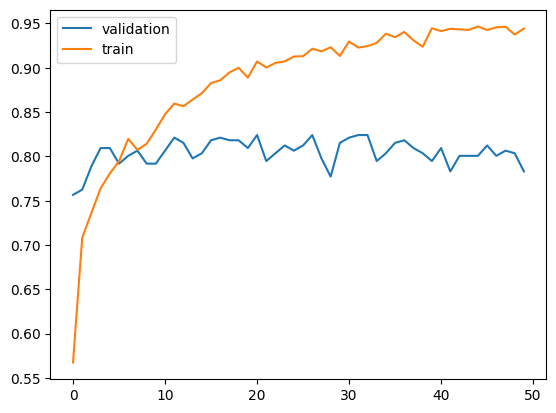

In [51]:
hist = history.history
plt.plot(hist["val_accuracy"], label = 'validation')
plt.plot(hist["accuracy"], label = 'train')
plt.legend()
plt.show()

#8.11 Training a larger model

- Train a 299x299 model

In [54]:
def make_model(input_size = 150, learning_rate = 0.01, size_inner=100, drop_rate = 0.5):
    base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(input_size,input_size, 3)
                      )

    base_model.trainable = False

    ###########################################
    #Create a new top
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    ###########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=["accuracy"]
                  )

    return model

In [61]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range = 10.0,
    zoom_range = 0.1,
    vertical_flip = True
    )

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(299, 299),
    batch_size=32)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(299, 299),
    batch_size=32,
    shuffle = False)



Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [62]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
    )

In [64]:
learning_rate = 0.001
size = 100
dropout = 0.2
input_size = 299

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    drop_rate=dropout)

history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.5307 - loss: 1.4256

96/96 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.5319 - loss: 1.4220 - val_accuracy: 0.8270 - val_loss: 0.5566
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.7681 - loss: 0.6807

96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 752ms/step - accuracy: 0.7680 - loss: 0.6807 - val_accuracy: 0.8358 - val_loss: 0.4773
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.7942 - loss: 0.6048

96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 736ms/step - accuracy: 0.7943 - loss: 0.6046 - val_accuracy: 0.8475 - val_loss: 0.4478
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 720ms/step - accuracy: 0.8322 - loss: 0.5081 - val_accuracy: 0.8475 - val_loss: 0.4387
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 734ms/step - accuracy: 0.8497 - loss: 0.4535 - val_accuracy: 0.8475 - val_loss: 0.4209
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 741ms/step - accuracy: 0.8368 - loss: 0.4735 - val_accuracy: 0.8416 - val_loss: 0.4419
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 769ms/step - accuracy: 0.8617 - loss: 0.4091 - val_accuracy: 0.8416 - val_loss: 0.4314
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.8664 - loss: 0.3901

96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 731ms/step - accuracy: 0.8664 - loss: 0.3901 - val_accuracy: 0.8534 - val_loss: 0.4113
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 872ms/step - accuracy: 0.8695 - loss: 0.3860 - val_accuracy: 0.8475 - val_loss: 0.4223
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8806 - loss: 0.3324

96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 802ms/step - accuracy: 0.8807 - loss: 0.3323 - val_accuracy: 0.8680 - val_loss: 0.3718
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 803ms/step - accuracy: 0.8910 - loss: 0.3380 - val_accuracy: 0.8563 - val_loss: 0.3935
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.8993 - loss: 0.3061

96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 757ms/step - accuracy: 0.8992 - loss: 0.3062 - val_accuracy: 0.8710 - val_loss: 0.3998
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 740ms/step - accuracy: 0.9079 - loss: 0.2700 - val_accuracy: 0.8358 - val_loss: 0.4335
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 748ms/step - accuracy: 0.9154 - loss: 0.2605 - val_accuracy: 0.8475 - val_loss: 0.4394
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 751ms/step - accuracy: 0.9153 - loss: 0.2696 - val_accuracy: 0.8651 - val_loss: 0.4015
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 737ms/step - accuracy: 0.8976 - loss: 0.2821 - val_accuracy: 0.8534 - val_loss: 0.4314
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 732ms/step - accuracy: 0.9095 - loss: 0.2528 - val_accuracy: 0.8475 - val_loss: 0.4301
Epoch 18/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 737ms/step - accuracy: 0.9226 - loss: 0.2339 - val_accuracy: 0.8563 - val_loss: 0.4267
Epoch 19/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 730ms/step - accuracy: 0.9249 - loss: 0.2295 - val_accuracy

KeyboardInterrupt: 

# 8.12 Using the model

- Loading the model
- Evaluating the model
- Getting predictions

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [4]:
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./clothing-dataset-small/test",
    target_size=(299, 299),
    batch_size=32,
    shuffle = False)

Found 372 images belonging to 10 classes.


In [9]:
model = keras.models.load_model("/content/xception_v4_12_0.871.h5")

In [10]:
model.evaluate(test_ds)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8359 - loss: 0.4290


[0.2989351153373718, 0.8924731016159058]

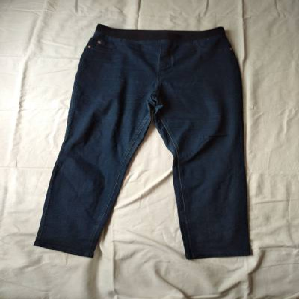

In [11]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
load_img(path, target_size=(299, 299))



In [12]:
img = load_img(path, target_size=(299, 299))

In [15]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [17]:
X = preprocess_input(X)
print(X)

[[[[ 0.09803927  0.06666672 -0.01960784]
   [ 0.10588241  0.07450986 -0.01176471]
   [ 0.12156868  0.09019613  0.00392163]
   ...
   [ 0.05098045  0.0196079  -0.0745098 ]
   [ 0.05882359  0.02745104 -0.06666666]
   [-0.04313725 -0.0745098  -0.16862744]]

  [[ 0.12156868  0.09019613  0.00392163]
   [ 0.13725495  0.10588241  0.0196079 ]
   [ 0.14509809  0.11372554  0.02745104]
   ...
   [ 0.05098045  0.0196079  -0.0745098 ]
   [ 0.05882359  0.02745104 -0.06666666]
   [-0.00392157 -0.03529412 -0.12941176]]

  [[ 0.13725495  0.10588241  0.0196079 ]
   [ 0.15294123  0.12156868  0.03529418]
   [ 0.16078436  0.12941182  0.04313731]
   ...
   [ 0.04313731  0.01176476 -0.08235294]
   [ 0.05882359  0.02745104 -0.06666666]
   [ 0.02745104 -0.00392157 -0.09803921]]

  ...

  [[ 0.20000005  0.18431377  0.0196079 ]
   [ 0.18431377  0.16078436  0.01176476]
   [ 0.17647064  0.15294123  0.00392163]
   ...
   [ 0.12156868  0.02745104 -0.09803921]
   [ 0.07450986 -0.01960784 -0.14509803]
   [-0.0745098  

In [19]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [22]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
    ]
dict(zip(classes,pred[0]))

{'dress': np.float32(-2.723205),
 'hat': np.float32(-5.075245),
 'longsleeve': np.float32(-1.2055775),
 'outwear': np.float32(-0.7457135),
 'pants': np.float32(10.171711),
 'shirt': np.float32(-0.5967206),
 'shoes': np.float32(-4.187178),
 'shorts': np.float32(5.2932367),
 'skirt': np.float32(-2.442388),
 't-shirt': np.float32(-5.890534)}